# CREACIÓN, HIPERPARAMETRIZACIÓN y OPTIMIZACIÓN DE LOS MODELOS

**1. CARGAR LOS DATOS**

In [1]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Cargamos los datos
data = pd.read_csv("estado_cultivo_limpio.csv")
data.head()

,CULTIVO,'CICLO DE CULTIVO','GRUPO CULTIVO',SUBGRUPO,'Area Sembrada(ha)','AREA COSECHADA(ha)',PRODUCCION(t),RENDIMIENTO(t/ha),'NOMBRE CIENTIFICO CULTIVO','ESTADO FISICO DEL CULTIVO'
0,SAbila,Permanente,'Cultivos para Condimentos y Bebidas Medicinal...,Medicinales,2.0,2.0,40.0,20.0,'Aloe vera','En fresco'
1,'Aguacate demAs variedades',Permanente,Frutales,'Demas frutales',680.0,648.0,6480.0,10.0,'Persea americana','En fresco'
2,'Banano consumo interno',Permanente,Frutales,'Demas frutales',215.0,154.0,4127.2,26.8,'Musa cavendishii','En fresco'
3,Granadilla,Permanente,Frutales,PasiflorAceas,0.0,0.0,0.0,0.0,'Passiflora ligularis.','En fresco'
4,Guayaba,Permanente,Frutales,MirtAceas,136.0,136.0,1468.8,10.8,'Psidium guajava L.','En fresco'


In [3]:
#Conocer los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CULTIVO                      2138 non-null   object 
 1   'CICLO DE CULTIVO'           2138 non-null   object 
 2   'GRUPO CULTIVO'              2138 non-null   object 
 3   SUBGRUPO                     2138 non-null   object 
 4   'Area Sembrada(ha)'          2138 non-null   float64
 5   'AREA COSECHADA(ha)'         2138 non-null   float64
 6   PRODUCCION(t)                2138 non-null   float64
 7   RENDIMIENTO(t/ha)            2138 non-null   float64
 8   'NOMBRE CIENTIFICO CULTIVO'  2138 non-null   object 
 9   'ESTADO FISICO DEL CULTIVO'  2138 non-null   object 
dtypes: float64(4), object(6)
memory usage: 167.2+ KB


In [4]:
#Correción tipo de datos
data['CULTIVO'] = data['CULTIVO'].astype('category')
data["'CICLO DE CULTIVO'"] = data["'CICLO DE CULTIVO'"].astype('category')
data["'GRUPO CULTIVO'"] = data["'GRUPO CULTIVO'"].astype('category')
data['SUBGRUPO'] = data['SUBGRUPO'].astype('category')
data["'NOMBRE CIENTIFICO CULTIVO'"] = data["'NOMBRE CIENTIFICO CULTIVO'"].astype('category')
data["'ESTADO FISICO DEL CULTIVO'"] = data["'ESTADO FISICO DEL CULTIVO'"].astype('category')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CULTIVO                      2138 non-null   category
 1   'CICLO DE CULTIVO'           2138 non-null   category
 2   'GRUPO CULTIVO'              2138 non-null   category
 3   SUBGRUPO                     2138 non-null   category
 4   'Area Sembrada(ha)'          2138 non-null   float64 
 5   'AREA COSECHADA(ha)'         2138 non-null   float64 
 6   PRODUCCION(t)                2138 non-null   float64 
 7   RENDIMIENTO(t/ha)            2138 non-null   float64 
 8   'NOMBRE CIENTIFICO CULTIVO'  2138 non-null   category
 9   'ESTADO FISICO DEL CULTIVO'  2138 non-null   category
dtypes: category(6), float64(4)
memory usage: 85.9 KB


**2. PREPARACIÓN Y GRÁFICAS DE LOS DATOS**

Los datos que se cargaron ya fueron preparados en la herramienta de Weka

In [6]:
# Instalar pandas profiling para gráficar los datos

!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [7]:
# Cargar librería para Profiling
from pandas_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=False) # minimal=True
profile_data

/tmp/ipython-input-2390340134.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 31.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**3. DIVISION 70 - 30 DE LOS DATOS Y BALANCEO DE LOS DATOS**

In [16]:
X = data.drop("'ESTADO FISICO DEL CULTIVO'", axis = 1)
Y = data["'ESTADO FISICO DEL CULTIVO'"]

from sklearn.model_selection import train_test_split
X_train_cv, X_test_final, Y_train_cv, Y_test_final = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

/tmp/ipython-input-3368385441.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["'ESTADO FISICO DEL CULTIVO'"] = Y_train_smote


<Axes: xlabel="'ESTADO FISICO DEL CULTIVO'">

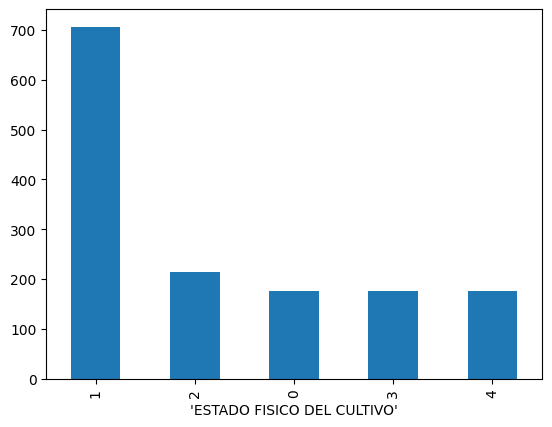

In [17]:
#Balanceo de solo el 70% de los datos

from os import device_encoding
#SMOTENC es para cuando hay variables categoricas
#SMOTE es cuando son variables numéricas
from imblearn.over_sampling import SMOTE, SMOTENC

total_categorias_objetivo = Y_train_cv.value_counts()
categoria_mayor = total_categorias_objetivo.max()

categorias_size = int(categoria_mayor * 0.25)

estr_dict = {}

for clase, count in total_categorias_objetivo.items():
  if count < categorias_size:
    estr_dict[clase] = categorias_size
  else:
    estr_dict[clase] = count

smote = SMOTENC(k_neighbors=2, categorical_features=[0,1,2,3,8], sampling_strategy=estr_dict)

X_train_smote, Y_train_smote = smote.fit_resample(X_train_cv, Y_train_cv)

data = pd.DataFrame(columns=X_train_smote.columns.values, data=X_train_smote)
data["'ESTADO FISICO DEL CULTIVO'"] = Y_train_smote
data["'ESTADO FISICO DEL CULTIVO'"].value_counts().plot(kind='bar')


**4. CREACIÓN DE DUMMIES, NORMALIZACIÓN DE LOS DATOS Y CODIFICACIÓN DE LA VARIABLE OBJETIVO**

In [10]:
#Se crean dummies a las variables predictoras categóricas (no a la variable obj)
data = pd.get_dummies(data, columns=["'CICLO DE CULTIVO'"], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['CULTIVO', "'GRUPO CULTIVO'", 'SUBGRUPO', "'NOMBRE CIENTIFICO CULTIVO'"], drop_first=False, dtype=int)

data.head()

,'Area Sembrada(ha)','AREA COSECHADA(ha)',PRODUCCION(t),RENDIMIENTO(t/ha),'ESTADO FISICO DEL CULTIVO','CICLO DE CULTIVO'_Transitorio,CULTIVO_'Aguacate Hass',CULTIVO_'Aguacate Papelillo',CULTIVO_'Aguacate demAs variedades',CULTIVO_'Banano consumo interno',...,'NOMBRE CIENTIFICO CULTIVO'_'Pisum sativum','NOMBRE CIENTIFICO CULTIVO'_'Plukenetia volubilis','NOMBRE CIENTIFICO CULTIVO'_'Pouteria sapota','NOMBRE CIENTIFICO CULTIVO'_'Psidium guajava L.','NOMBRE CIENTIFICO CULTIVO'_'Saccharum officinarum L.','NOMBRE CIENTIFICO CULTIVO'_'Solanum betaceum','NOMBRE CIENTIFICO CULTIVO'_'Solanum quitoense Lam','NOMBRE CIENTIFICO CULTIVO'_'Solanum tuberosum','NOMBRE CIENTIFICO CULTIVO'_'Theobrama cacao L.','NOMBRE CIENTIFICO CULTIVO'_'Zea mays'
0,10.0,6.0,12.0,2.00,'En fresco',1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2220.0,2200.0,26400.0,12.00,'En fresco',0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.4,4.4,4.0,0.91,'Grano seco',1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,628.0,520.0,364.0,0.70,'Grano seco',0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2867.0,2335.0,2989.0,1.28,'Pergamino o seco de trilla',0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Se codifican las categorias de la VARIABLE OBJETIVO

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["'ESTADO FISICO DEL CULTIVO'"]=labelencoder.fit_transform(data["'ESTADO FISICO DEL CULTIVO'"]) #Objetivo

data.head()

,'Area Sembrada(ha)','AREA COSECHADA(ha)',PRODUCCION(t),RENDIMIENTO(t/ha),'CICLO DE CULTIVO'_Transitorio,CULTIVO_'Aguacate Hass',CULTIVO_'Aguacate Papelillo',CULTIVO_'Aguacate demAs variedades',CULTIVO_'Banano consumo interno',CULTIVO_'Cana Panelera',...,'NOMBRE CIENTIFICO CULTIVO'_'Plukenetia volubilis','NOMBRE CIENTIFICO CULTIVO'_'Pouteria sapota','NOMBRE CIENTIFICO CULTIVO'_'Psidium guajava L.','NOMBRE CIENTIFICO CULTIVO'_'Saccharum officinarum L.','NOMBRE CIENTIFICO CULTIVO'_'Solanum betaceum','NOMBRE CIENTIFICO CULTIVO'_'Solanum quitoense Lam','NOMBRE CIENTIFICO CULTIVO'_'Solanum tuberosum','NOMBRE CIENTIFICO CULTIVO'_'Theobrama cacao L.','NOMBRE CIENTIFICO CULTIVO'_'Zea mays','ESTADO FISICO DEL CULTIVO'
0,7.00,6.80,6.80,1.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,40.00,39.00,1770.00,45.38,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,26.00,26.00,312.00,12.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,173.61,143.56,135.09,0.94,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1.00,1.00,2.00,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**5. VALIDACIÓN CRUZADA**

In [19]:
#Validación Cruzada
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame() #Almacenamos en el dataframe para comparar

#Medidas de evaluación - Si son mas de 2 categorias debe de ser macro
scoring=('f1_macro', 'accuracy','precision_macro', 'recall_macro')

#Muestreo estratificado
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


**6. ENTRENAMIENTO DE MODELOS**


**`6.1 TREE`**

In [20]:
#Método de ML a usar en la validación cruzada
from sklearn import tree

modelTree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, max_depth=10)

scores = cross_validate(modelTree, X_train_smote, Y_train_smote, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.022047,0.015858,0.976835,0.981872,0.979310,0.982362,0.983333,0.986649,0.972727,0.978007
1,0.018816,0.013054,0.988447,0.987677,0.986207,0.987730,0.983333,0.983741,0.994366,0.991838
2,0.019606,0.016757,0.965130,0.984497,0.965517,0.983896,0.960337,0.979596,0.970694,0.989752
3,0.018458,0.012840,0.988092,0.984173,0.986207,0.983896,0.988092,0.989876,0.988092,0.979354
4,0.018884,0.013427,0.980399,0.980759,0.979310,0.981595,0.983918,0.986298,0.978135,0.976343
5,0.018800,0.012625,0.987222,0.984280,0.986207,0.983896,0.994521,0.989065,0.980952,0.980173
6,0.018358,0.012824,0.973468,0.983450,0.972414,0.983129,0.989333,0.990431,0.961905,0.977694
7,0.019122,0.013443,0.954365,0.984076,0.958621,0.984663,0.976140,0.987568,0.942857,0.981210
8,0.019108,0.013132,0.973392,0.978560,0.972414,0.978528,0.989189,0.987747,0.961905,0.971477
9,0.018547,0.015399,0.981730,0.983811,0.979167,0.983142,0.978920,0.978808,0.984762,0.989251


In [21]:
scores.mean()

,0
fit_time,0.019175
score_time,0.013936
test_f1_macro,0.976908
train_f1_macro,0.983315
test_accuracy,0.976537
train_accuracy,0.983284
test_precision_macro,0.982712
train_precision_macro,0.985978
test_recall_macro,0.973640
train_recall_macro,0.981510


In [22]:
#Se almacena en el df la medida a comparar
comparacion_CV['Tree']=scores['test_recall_macro']
comparacion_CV['fit_time_Tree']=scores['fit_time']
comparacion_CV['score_time_Tree']=scores['score_time']
print(comparacion_CV)

       Tree  fit_time_Tree  score_time_Tree
0  0.972727       0.022047         0.015858
1  0.994366       0.018816         0.013054
2  0.970694       0.019606         0.016757
3  0.988092       0.018458         0.012840
4  0.978135       0.018884         0.013427
5  0.980952       0.018800         0.012625
6  0.961905       0.018358         0.012824
7  0.942857       0.019122         0.013443
8  0.961905       0.019108         0.013132
9  0.984762       0.018547         0.015399


In [23]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
variables_numericas=["'Area Sembrada(ha)'","'AREA COSECHADA(ha)'", 'PRODUCCION(t)', 'RENDIMIENTO(t/ha)']

min_max_scaler.fit(data[variables_numericas]) #Ajuste de los parametros: max - min
data[variables_numericas]= min_max_scaler.transform(data[variables_numericas]) #70%
data.head()

,'Area Sembrada(ha)','AREA COSECHADA(ha)',PRODUCCION(t),RENDIMIENTO(t/ha),'CICLO DE CULTIVO'_Transitorio,CULTIVO_'Aguacate Hass',CULTIVO_'Aguacate Papelillo',CULTIVO_'Aguacate demAs variedades',CULTIVO_'Banano consumo interno',CULTIVO_'Cana Panelera',...,'NOMBRE CIENTIFICO CULTIVO'_'Plukenetia volubilis','NOMBRE CIENTIFICO CULTIVO'_'Pouteria sapota','NOMBRE CIENTIFICO CULTIVO'_'Psidium guajava L.','NOMBRE CIENTIFICO CULTIVO'_'Saccharum officinarum L.','NOMBRE CIENTIFICO CULTIVO'_'Solanum betaceum','NOMBRE CIENTIFICO CULTIVO'_'Solanum quitoense Lam','NOMBRE CIENTIFICO CULTIVO'_'Solanum tuberosum','NOMBRE CIENTIFICO CULTIVO'_'Theobrama cacao L.','NOMBRE CIENTIFICO CULTIVO'_'Zea mays','ESTADO FISICO DEL CULTIVO'
0,0.001257,0.001659,0.000020,0.004560,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0.007180,0.009515,0.005099,0.206922,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.004667,0.006343,0.000899,0.054717,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.031163,0.035023,0.000389,0.004286,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0.000180,0.000244,0.000006,0.009120,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**`6.2 RED NEURONAL`**



In [24]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier(activation="relu",hidden_layer_sizes=(5,20), learning_rate='constant',
                     learning_rate_init=0.6, momentum= 0.8, max_iter=500, random_state=3)

scores = cross_validate(model_nn, X_train_smote, Y_train_smote, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.165001,0.015415,0.130233,0.136238,0.482759,0.489264,0.096552,0.297696,0.2,0.202516
1,0.233539,0.015051,0.131481,0.130995,0.489655,0.486963,0.097931,0.097393,0.2,0.200000
2,0.253968,0.013638,0.131481,0.130995,0.489655,0.486963,0.097931,0.097393,0.2,0.200000
3,0.254172,0.014330,0.131481,0.130995,0.489655,0.486963,0.097931,0.097393,0.2,0.200000
4,0.306736,0.014547,0.131481,0.130995,0.489655,0.486963,0.097931,0.097393,0.2,0.200000
5,0.173373,0.016722,0.131481,0.130995,0.489655,0.486963,0.097931,0.097393,0.2,0.200000
6,0.200523,0.013985,0.131481,0.130995,0.489655,0.486963,0.097931,0.097393,0.2,0.200000
7,0.181289,0.017957,0.130233,0.131134,0.482759,0.487730,0.096552,0.097546,0.2,0.200000
8,0.169804,0.016681,0.130233,0.131134,0.482759,0.487730,0.096552,0.097546,0.2,0.200000
9,0.229113,0.014590,0.130841,0.131066,0.486111,0.487356,0.097222,0.097471,0.2,0.200000


In [25]:
scores.mean()

,0
fit_time,0.216752
score_time,0.015292
test_f1_macro,0.131043
train_f1_macro,0.131554
test_accuracy,0.487232
train_accuracy,0.487386
test_precision_macro,0.097446
train_precision_macro,0.117461
test_recall_macro,0.200000
train_recall_macro,0.200252


In [26]:
#Se almacena en el df la medida a comparar
comparacion_CV['Red Neuronal']=scores['test_recall_macro']
comparacion_CV['fit_time_NN']=scores['fit_time']
comparacion_CV['score_time_NN']=scores['score_time']
print(comparacion_CV)

       Tree  fit_time_Tree  score_time_Tree  Red Neuronal  fit_time_NN  \
0  0.972727       0.022047         0.015858           0.2     0.165001   
1  0.994366       0.018816         0.013054           0.2     0.233539   
2  0.970694       0.019606         0.016757           0.2     0.253968   
3  0.988092       0.018458         0.012840           0.2     0.254172   
4  0.978135       0.018884         0.013427           0.2     0.306736   
5  0.980952       0.018800         0.012625           0.2     0.173373   
6  0.961905       0.018358         0.012824           0.2     0.200523   
7  0.942857       0.019122         0.013443           0.2     0.181289   
8  0.961905       0.019108         0.013132           0.2     0.169804   
9  0.984762       0.018547         0.015399           0.2     0.229113   

   score_time_NN  
0       0.015415  
1       0.015051  
2       0.013638  
3       0.014330  
4       0.014547  
5       0.016722  
6       0.013985  
7       0.017957  
8       0.0166

**`6.3 RANDOM FOREST`**

In [27]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10,
                                  min_samples_leaf=5, random_state=42)

scores = cross_validate(model_rf, X_train_smote, Y_train_smote, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores


,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.287643,0.026536,1.000000,0.998533,1.000000,0.998466,1.000000,0.999373,1.000000,0.997700
1,0.274325,0.022802,1.000000,0.999212,1.000000,0.999233,1.000000,0.999686,1.000000,0.998742
2,0.241781,0.023098,0.992541,0.999323,0.993103,0.999233,0.997222,0.998964,0.988235,0.999685
3,0.276438,0.022641,1.000000,0.997851,1.000000,0.997699,1.000000,0.998329,1.000000,0.997378
4,0.250839,0.022424,0.993930,0.999208,0.993103,0.999233,0.990909,0.999686,0.997183,0.998734
5,0.247767,0.022875,0.993723,0.998531,0.993103,0.998466,0.997222,0.999372,0.990476,0.997698
6,0.257312,0.020802,1.000000,0.998533,1.000000,0.998466,1.000000,0.998654,1.000000,0.998419
7,0.246265,0.022543,1.000000,0.998534,1.000000,0.998466,1.000000,0.998655,1.000000,0.998420
8,0.236858,0.021240,0.987183,0.997179,0.986207,0.996933,0.994444,0.998018,0.980952,0.996347
9,0.238476,0.036851,1.000000,0.999212,1.000000,0.999234,1.000000,0.999686,1.000000,0.998742


In [28]:
scores.mean()

,0
fit_time,0.255770
score_time,0.024181
test_f1_macro,0.996738
train_f1_macro,0.998612
test_accuracy,0.996552
train_accuracy,0.998543
test_precision_macro,0.997980
train_precision_macro,0.999042
test_recall_macro,0.995685
train_recall_macro,0.998187


In [29]:
#Se almacena en el df la medida a comparar
comparacion_CV['Random Forest']=scores['test_recall_macro']
comparacion_CV['fit_time_RF']=scores['fit_time']
comparacion_CV['score_time_RF']=scores['score_time']
print(comparacion_CV)

       Tree  fit_time_Tree  score_time_Tree  Red Neuronal  fit_time_NN  \
0  0.972727       0.022047         0.015858           0.2     0.165001   
1  0.994366       0.018816         0.013054           0.2     0.233539   
2  0.970694       0.019606         0.016757           0.2     0.253968   
3  0.988092       0.018458         0.012840           0.2     0.254172   
4  0.978135       0.018884         0.013427           0.2     0.306736   
5  0.980952       0.018800         0.012625           0.2     0.173373   
6  0.961905       0.018358         0.012824           0.2     0.200523   
7  0.942857       0.019122         0.013443           0.2     0.181289   
8  0.961905       0.019108         0.013132           0.2     0.169804   
9  0.984762       0.018547         0.015399           0.2     0.229113   

   score_time_NN  Random Forest  fit_time_RF  score_time_RF  
0       0.015415       1.000000     0.287643       0.026536  
1       0.015051       1.000000     0.274325       0.022802  

**7. METODOS DE ENSAMBLE**

**`7.1 GRADIENT BOOSTING`**

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

#tasa de aprendizaje controla el tamaño de la actualización de cada modelo
model_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8,
                                       min_samples_leaf=2, max_depth=10)


scores = cross_validate(model_gbc, X_train_smote, Y_train_smote, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,10.919171,0.021047,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
1,6.887449,0.029760,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
2,5.290019,0.018545,0.992541,1.0,0.993103,1.0,0.997222,1.0,0.988235,1.0
3,6.392071,0.025922,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
4,5.548774,0.017558,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
5,6.272942,0.026081,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
6,6.422033,0.019433,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
7,6.239600,0.028866,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
8,6.356157,0.019227,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
9,5.915383,0.027008,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0


In [31]:
scores.mean()

,0
fit_time,6.624360
score_time,0.023345
test_f1_macro,0.999254
train_f1_macro,1.000000
test_accuracy,0.999310
train_accuracy,1.000000
test_precision_macro,0.999722
train_precision_macro,1.000000
test_recall_macro,0.998824
train_recall_macro,1.000000


In [32]:
#Se almacena en el df la medida a comparar
comparacion_CV['Gradient Boosting']=scores['test_recall_macro']
comparacion_CV['fit_time_gb']=scores['fit_time']
comparacion_CV['score_time_gb']=scores['score_time']
print(comparacion_CV)

       Tree  fit_time_Tree  score_time_Tree  Red Neuronal  fit_time_NN  \
0  0.972727       0.022047         0.015858           0.2     0.165001   
1  0.994366       0.018816         0.013054           0.2     0.233539   
2  0.970694       0.019606         0.016757           0.2     0.253968   
3  0.988092       0.018458         0.012840           0.2     0.254172   
4  0.978135       0.018884         0.013427           0.2     0.306736   
5  0.980952       0.018800         0.012625           0.2     0.173373   
6  0.961905       0.018358         0.012824           0.2     0.200523   
7  0.942857       0.019122         0.013443           0.2     0.181289   
8  0.961905       0.019108         0.013132           0.2     0.169804   
9  0.984762       0.018547         0.015399           0.2     0.229113   

   score_time_NN  Random Forest  fit_time_RF  score_time_RF  \
0       0.015415       1.000000     0.287643       0.026536   
1       0.015051       1.000000     0.274325       0.022802

**`7.2 XGBOOST`**

In [33]:
import xgboost as xgb


model_xgb = xgb.XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8
)

scores = cross_validate(model_xgb, X_train_smote, Y_train_smote, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,1.800525,0.101951,1.000000,0.999212,1.000000,0.999233,1.000000,0.999686,1.000000,0.998742
1,0.644824,0.037386,1.000000,0.999212,1.000000,0.999233,1.000000,0.999686,1.000000,0.998742
2,0.370484,0.034132,0.992541,1.000000,0.993103,1.000000,0.997222,1.000000,0.988235,1.000000
3,0.410642,0.040282,1.000000,0.999208,1.000000,0.999233,1.000000,0.999686,1.000000,0.998734
4,0.397073,0.035235,0.993930,0.999208,0.993103,0.999233,0.990909,0.999686,0.997183,0.998734
5,0.402866,0.037462,1.000000,0.999208,1.000000,0.999233,1.000000,0.999686,1.000000,0.998734
6,0.398194,0.035277,1.000000,0.999208,1.000000,0.999233,1.000000,0.999686,1.000000,0.998734
7,0.438723,0.037500,1.000000,0.999208,1.000000,0.999233,1.000000,0.999686,1.000000,0.998734
8,0.409737,0.035800,1.000000,0.999208,1.000000,0.999233,1.000000,0.999686,1.000000,0.998734
9,0.415684,0.047256,1.000000,0.999212,1.000000,0.999234,1.000000,0.999686,1.000000,0.998742


In [34]:
scores.mean()

,0
fit_time,0.568875
score_time,0.044228
test_f1_macro,0.998647
train_f1_macro,0.999288
test_accuracy,0.998621
train_accuracy,0.999310
test_precision_macro,0.998813
train_precision_macro,0.999717
test_recall_macro,0.998542
train_recall_macro,0.998863


In [35]:
#Se almacena en el df la medida a comparar
comparacion_CV['XGBOOST']=scores['test_recall_macro']
comparacion_CV['fit_time_xboost']=scores['fit_time']
comparacion_CV['score_time_xboost']=scores['score_time']
print(comparacion_CV)

       Tree  fit_time_Tree  score_time_Tree  Red Neuronal  fit_time_NN  \
0  0.972727       0.022047         0.015858           0.2     0.165001   
1  0.994366       0.018816         0.013054           0.2     0.233539   
2  0.970694       0.019606         0.016757           0.2     0.253968   
3  0.988092       0.018458         0.012840           0.2     0.254172   
4  0.978135       0.018884         0.013427           0.2     0.306736   
5  0.980952       0.018800         0.012625           0.2     0.173373   
6  0.961905       0.018358         0.012824           0.2     0.200523   
7  0.942857       0.019122         0.013443           0.2     0.181289   
8  0.961905       0.019108         0.013132           0.2     0.169804   
9  0.984762       0.018547         0.015399           0.2     0.229113   

   score_time_NN  Random Forest  fit_time_RF  score_time_RF  \
0       0.015415       1.000000     0.287643       0.026536   
1       0.015051       1.000000     0.274325       0.022802

In [36]:
comparacion_CV

,Tree,fit_time_Tree,score_time_Tree,Red Neuronal,fit_time_NN,score_time_NN,Random Forest,fit_time_RF,score_time_RF,Gradient Boosting,fit_time_gb,score_time_gb,XGBOOST,fit_time_xboost,score_time_xboost
0,0.972727,0.022047,0.015858,0.2,0.165001,0.015415,1.000000,0.287643,0.026536,1.000000,10.919171,0.021047,1.000000,1.800525,0.101951
1,0.994366,0.018816,0.013054,0.2,0.233539,0.015051,1.000000,0.274325,0.022802,1.000000,6.887449,0.029760,1.000000,0.644824,0.037386
2,0.970694,0.019606,0.016757,0.2,0.253968,0.013638,0.988235,0.241781,0.023098,0.988235,5.290019,0.018545,0.988235,0.370484,0.034132
3,0.988092,0.018458,0.012840,0.2,0.254172,0.014330,1.000000,0.276438,0.022641,1.000000,6.392071,0.025922,1.000000,0.410642,0.040282
4,0.978135,0.018884,0.013427,0.2,0.306736,0.014547,0.997183,0.250839,0.022424,1.000000,5.548774,0.017558,0.997183,0.397073,0.035235
5,0.980952,0.018800,0.012625,0.2,0.173373,0.016722,0.990476,0.247767,0.022875,1.000000,6.272942,0.026081,1.000000,0.402866,0.037462
6,0.961905,0.018358,0.012824,0.2,0.200523,0.013985,1.000000,0.257312,0.020802,1.000000,6.422033,0.019433,1.000000,0.398194,0.035277
7,0.942857,0.019122,0.013443,0.2,0.181289,0.017957,1.000000,0.246265,0.022543,1.000000,6.239600,0.028866,1.000000,0.438723,0.037500
8,0.961905,0.019108,0.013132,0.2,0.169804,0.016681,0.980952,0.236858,0.021240,1.000000,6.356157,0.019227,1.000000,0.409737,0.035800
9,0.984762,0.018547,0.015399,0.2,0.229113,0.014590,1.000000,0.238476,0.036851,1.000000,5.915383,0.027008,1.000000,0.415684,0.047256


**8. HIPERPARAMETRIZACIÓN DE LOS MODELOS**

In [37]:
#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])

**`8.1 ÁRBOL DE CLASIFICACIÓN`**

In [38]:
#  Arbol
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[2,10,50,100] # Cantidad de registros por hoja
max_depth=[None, 10,20,50] #Niveles de profundidad

#Hiperparametrización
from sklearn.model_selection import GridSearchCV

param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=3) #cv=10
grid.fit(X_train_smote, Y_train_smote) #70%

#Mejor modelo
modelTree= grid.best_estimator_

medidas['Tree']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2}
                 Tree
f1 de la CV  0.996213


**`8.2 RANDOM FOREST`**

Este no terminó de ejecutar

In [ ]:
#Random Forest

from sklearn.neural_network import MLPClassifier
model_rf = RandomForestClassifier()


# Definir los parametros
random_state=[1]                   # Semilla para generar número pseudoaleatorios
n_estimators=[100, 300, 500]       # Cantidad de árboles
max_depth=[10, 20, None]           # Profundidad máxima del árbol
criterion=['gini', 'entropy']      # Criterio para medir la calidad de la división
min_samples_split=[2, 10, 20]      # Parámetro de poda
min_samples_leaf=[1, 5, 10]        # Parámetro de poda
max_features=['sqrt', 'log2', 0.8] # Número de features a considerar en cada split
class_weight=['balanced', None]    # Controla el desbalanceo (buena práctica)

#Grid
param_grid = dict(
    random_state=random_state,
    n_estimators=n_estimators,
    max_depth=max_depth,
    criterion=criterion,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    class_weight=class_weight
)
grid = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=cv) #cv=10
grid.fit(X_train_smote, Y_train_smote)

#Mejor modelo
model_rf= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas['Random Forest']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

**`8.3 XGBOOST`**

In [39]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

model_xgb = xgb.XGBClassifier()

# Definir los parametros
n_estimators = [100, 300, 500]       # Número de árboles
max_depth = [3, 6, 9]                # Profundidad máxima de los árboles
learning_rate = [0.01, 0.1, 0.2]     # Tasa de aprendizaje
subsample = [0.7, 0.9, 1.0]          # Submuestra de datos para entrenar cada árbol
colsample_bytree = [0.7, 0.9, 1.0]    # Submuestra de columnas para entrenar cada árbol

#Grid
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)

grid = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=cv) #cv=10
grid.fit(X_train_smote, Y_train_smote)

#Mejor modelo
model_xgb= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas['XGB']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)


{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
                 Tree       XGB
f1 de la CV  0.996213  0.999254


**9. OPTIMIZACIÓN DE LOS MODELOS**

In [40]:
!pip install sklearn-genetic-opt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 6.3 MB/s eta 0:00:00


**`9.1 ÁRBOL DE CLASIFICACIÓN`**

In [41]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer

modelTree = DecisionTreeClassifier()

scoring_metric = make_scorer(f1_score, average='macro')

param_grid = {
    'criterion': Categorical(['gini', 'entropy']), # Criterio de división
    'max_depth': Integer(5, 50),                   # Profundidad máxima (ajustado de 500 a 50)
    'min_samples_leaf': Integer(2, 50),            # Cantidad mínima de muestras en una hoja
    'min_samples_split': Integer(2, 20),           # Cantidad mínima para dividir un nodo
}

evolved_estimator = GASearchCV(
    estimator=modelTree,
    cv=cv,                                      # Usamos la CV estratificada (10 pliegues)
    scoring=scoring_metric,                     # Métrica de clasificación (F1 Macro)
    population_size=50,                         # Tamaño de la población (aumentado para mejor búsqueda)
    generations=20,                             # Generaciones o iteraciones (20-35 es un buen rango inicial)
    elitism=True,
    crossover_probability=0.8,                  # Probabilidad de recombinación (0.8-0.9 es común)
    mutation_probability=0.1,                   # Probabilidad de mutación (0.1-0.3 es común)
    param_grid=param_grid,
    criteria='max',                             # Queremos maximizar el score (F1 Macro)
    verbose=True,
    n_jobs=-1                                   # Usa todos los núcleos para acelerar
)

#Aprendizaje del modelo
evolved_estimator.fit(X_train_smote, Y_train_smote)

#Mejor modelo
best_params= evolved_estimator.best_params_
genetics_best_model= evolved_estimator.best_estimator_
print(best_params)



gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.962755	0.0190518  	0.997388   	0.93137    
1  	91    	0.975665	0.0135232  	0.996781   	0.940058   
2  	91    	0.986016	0.00763041 	0.996781   	0.974625   
3  	89    	0.991816	0.00534609 	0.997312   	0.977474   
4  	87    	0.994854	0.00280468 	0.997388   	0.97757    
5  	87    	0.996238	0.00101479 	0.997388   	0.993198   
6  	90    	0.997091	0.000453726	0.997388   	0.995588   
7  	95    	0.997371	8.62069e-05	0.997388   	0.996781   
8  	94    	0.997385	1.47801e-05	0.997388   	0.997312   
9  	90    	0.997388	1.22125e-15	0.997388   	0.997388   
10 	95    	0.997388	1.22125e-15	0.997388   	0.997388   
11 	88    	0.997388	1.22125e-15	0.997388   	0.997388   
12 	92    	0.997388	1.22125e-15	0.997388   	0.997388   
13 	83    	0.997388	1.22125e-15	0.997388   	0.997388   
14 	86    	0.997388	1.22125e-15	0.997388   	0.997388   
15 	86    	0.997388	1.22125e-15	0.997388   	0.997388   
16 	87    	0.997388	1.22125e-15	0.997388   	0.99

**`9.2 RANDOM FOREST`**

In [43]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold

model_rf = RandomForestClassifier()
scoring_metric = make_scorer(f1_score, average='macro')


param_grid = {'max_depth': Integer(2, 500),
              'min_samples_leaf': Integer(2, 100),
              'n_estimators': Integer(100, 300),
              'max_samples': Continuous(0.5, 0.9),
              }

evolved_estimator = GASearchCV(estimator=model_rf,
                               cv=cv, #10
                               scoring='neg_mean_squared_error', #maximiza scoring
                               population_size=20, #tamaño de la población es constante
                               generations=35, #generaciones o iteraciones
                               elitism=True, #selección de padres
                               crossover_probability=0.4, #porcentaje para hacer recombinación
                               mutation_probability=0.6, #porcentaje de mutación
                               param_grid=param_grid,
                               criteria='max',
                               verbose=True)

#Aprendizaje del modelo
evolved_estimator.fit(X_train_smote, Y_train_smote)

#Mejor modelo
best_params= evolved_estimator.best_params_
genetics_best_model= evolved_estimator.best_estimator_
print(best_params)


gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	20    	-0.445518	0.510276   	-0.0131034 	-1.81023   
1  	40    	-0.140061	0.103601   	-0.0131034 	-0.265704  
2  	40    	-0.0569636	0.0704232  	-0.0117241 	-0.21808   
3  	40    	-0.0222478	0.0296845  	-0.0110393 	-0.123511  
4  	40    	-0.0119674	0.00199052 	-0.00689655	-0.0144875 
5  	40    	-0.0107598	0.00251922 	-0.00689655	-0.0137931 
6  	40    	-0.00841451	0.00208818 	-0.00689655	-0.0124138 
7  	40    	-0.00689655	0          	-0.00689655	-0.00689655
8  	40    	-0.00689655	0          	-0.00689655	-0.00689655
9  	40    	-0.00689655	0          	-0.00689655	-0.00689655
10 	40    	-0.00689655	0          	-0.00689655	-0.00689655
11 	40    	-0.00689655	0          	-0.00689655	-0.00689655
12 	40    	-0.00689655	0          	-0.00689655	-0.00689655
13 	40    	-0.00689655	0          	-0.00689655	-0.00689655
14 	40    	-0.00689655	0          	-0.00689655	-0.00689655
15 	40    	-0.00689655	0          	-0.00689655	-0.00689655
16 	40 

**`9.3 XGBOOST`**

In [42]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold

model_xgb = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss', # Métrica logarítmica para clasificación multiclase
    random_state=42
)

#Ajuste de parametros

param_grid_xgb = {
    'n_estimators': Integer(100, 500),         # Número de rondas de boosting (árboles)
    'max_depth': Integer(3, 15),               # Profundidad máxima de los árboles
    'learning_rate': Continuous(0.01, 0.3),    # Tasa de aprendizaje (Continuous es ideal aquí)
    'subsample': Continuous(0.6, 1.0),         # Fracción de muestras usadas por árbol
    'colsample_bytree': Continuous(0.6, 1.0),  # Fracción de columnas usadas por árbol
    'gamma': Continuous(0, 5),                 # Parámetro de regularización (mínima pérdida requerida para hacer una división)
    'lambda': Continuous(1, 5)                 # Regularización L2 (similar a weight_decay)
}

scoring_metric = make_scorer(f1_score, average='macro')

evolved_estimator = GASearchCV(
    estimator=model_xgb,
    cv=cv,                                      # Usamos la CV estratificada predefinida
    scoring=scoring_metric,                     # Métrica de clasificación (F1 Macro)
    population_size=50,                         # Tamaño de la población
    generations=20,                             # Número de generaciones (aumenta para mejor resultado)
    elitism=True,
    crossover_probability=0.8,
    mutation_probability=0.1,
    param_grid=param_grid_xgb,                  # Usamos los parámetros de XGBoost
    criteria='max',                             # Queremos maximizar el score
    verbose=True,
    n_jobs=-1
)

#Aprendizaje del modelo
evolved_estimator.fit(X_train_smote, Y_train_smote)

#Mejor modelo
best_params= evolved_estimator.best_params_
genetics_best_model= evolved_estimator.best_estimator_
print(best_params)


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.998201	0.000957761	0.998647   	0.994077   
1  	85    	0.998659	8.49744e-05	0.999254   	0.998647   
2  	91    	0.998647	8.88178e-16	0.998647   	0.998647   
3  	94    	0.998622	0.000176024	0.998647   	0.99739    
4  	92    	0.998647	8.88178e-16	0.998647   	0.998647   
5  	92    	0.998647	8.88178e-16	0.998647   	0.998647   
6  	91    	0.998647	8.88178e-16	0.998647   	0.998647   
7  	91    	0.998647	8.88178e-16	0.998647   	0.998647   
8  	86    	0.998647	8.88178e-16	0.998647   	0.998647   
9  	88    	0.998647	8.88178e-16	0.998647   	0.998647   
10 	89    	0.998647	8.88178e-16	0.998647   	0.998647   
11 	95    	0.998647	8.88178e-16	0.998647   	0.998647   
12 	92    	0.998647	8.88178e-16	0.998647   	0.998647   
13 	90    	0.998647	8.88178e-16	0.998647   	0.998647   
14 	90    	0.998647	8.88178e-16	0.998647   	0.998647   
15 	88    	0.998647	8.88178e-16	0.998647   	0.998647   
16 	90    	0.998647	8.88178e-16	0.998647   	0.99

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:25:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'n_estimators': 139, 'max_depth': 11, 'learning_rate': np.float64(0.011630507302852297), 'subsample': np.float64(0.9209031264453847), 'colsample_bytree': np.float64(0.6611613339200028), 'gamma': np.float64(0.42104654461062485), 'lambda': np.float64(1.1633318452079258)}


**10. EVALUACIÓN DE LOS MODELOS CON EL 30%**

Empty DataFrame
Columns: []
Index: [mse, rmse, mae, mape, max]


/tmp/ipython-input-1625105200.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test_final.min(), Y_test_final.max()], [Y_test_final.min(), Y_test_final.max()],'k--', color = 'black', lw=2)


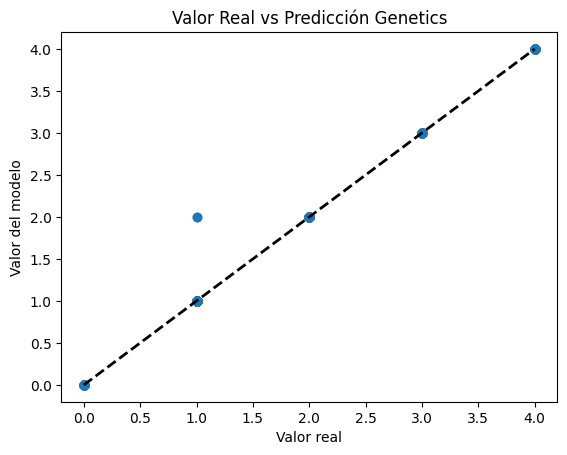

In [45]:
#Evaluación
from sklearn import metrics
Y_pred= genetics_best_model.predict(X_test_final) #30%

mse = metrics.mean_squared_error(Y_test_final,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test_final,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test_final,Y_pred)
max=metrics.max_error(Y_test_final,Y_pred)
medidas= pd.DataFrame(index=['mse','rmse','mae','mape','max'])
print(medidas)
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test_final, Y_pred)
plt.plot([Y_test_final.min(), Y_test_final.max()], [Y_test_final.min(), Y_test_final.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Genetics')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

**9. Se guarda el modelo**

In [46]:
#Tree
X[variables_numericas]= min_max_scaler.inverse_transform(X[variables_numericas])
modelTree.fit(X, Y) #100%

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=3)

In [47]:
import pickle

filename = 'modeloCV.pkl'

variables=X.columns._values

pickle.dump([modelTree,variables,labelencoder,min_max_scaler], open(filename, 'wb'))